<span style="color:#1871d6; font-size:24px; font-weight:700"> Normal distributions

We saw in module 1 how a normal distribution looks and discussed what questions we can answer about a variable knowing that it is normally distributed. 
We can say a distribution, X, is normally distributed mathematically as below... 

$$ X ∼ norm(mean = µ, sd = σ) $$

where µ (mu) is the mean of the normal distribution and σ (sigma) is the standard deviation of the distribution. 

The associated R function, which generates a standard normal distribution with mean 0 and standard deviation of 1, is `dnorm(x, mean = 0, sd = 1)`.

**Reference:** Discrete and continuous probability distributions: https://stattrek.com/probability-distributions/discrete-continuous.aspx

-----

The values of the distribution lie around the (sample) mean in specific proportions.  This is commonly called the <span style="color:#e57f0b; font-size:14px; font-weight:700">68-95-99.7</span> rule. 
We can see where this rule comes from using `pnorm()` function in R.

Here is a summary that goes over some of the functions we're about to cover: http://seankross.com/notes/dpqr/


<span style="color:#e57f0b; font-size:14px; font-weight:700">pnorm()</span>

The function pnorm() returns the **area under the curve**, from −∞ (negative infinity) to $q$ of the probability density function (pdf) of the normal distribution.  `pnorm()` takes $q$, the mean, and the standard deviation as its arguments.  If mean and standard deviation are not specified, it considers mean = 0 and sd = 1 by default. The pnorm() function can also take the argument `lower.tail`. If `lower.tail` is set equal to FALSE, then pnorm returns the integral from $q$ to ∞ (positive infinity) of the pdf of the normal distribution.  You can think of `pnorm()` as being the function that replaces the table of probabilites and Z-scores at the back of every statistics textbook.  When plotted in R, `pnorm()` returns the cumulative distribution function (cdf) of the normal distribution.  In fact, this function also goes by the name **Cumulative Distribution Function**.

This video provides an introduction to continuous probability distributions and probability density functions: https://www.youtube.com/watch?v=OWSOhpS00_s&list=PLvxOuBpazmsPDZGwqhhjE3KkLWnTD34R0.

In the below example, the `pnorm()` function takes 3 numbers (i.e., 1, 2, and 3) and returns the area under the curve (i.e., called the _integral_) for the normal distribution.  That is, it returns the area under the curve that is from −∞ to each number (i.e., $q$).  The areas under the curve (i.e., probabilities) are determined according to the 68-95-99.7 rule. 

Below, we are not supplying the mean and standard deviation to the function. 
So, mean and sd are assumed to be 0 and 1, respectively, by default.
So, what is the area below the curve that is to the left of the first input value '1'? 
We know that 50% of the area under standard normal curve will be below the mean. 

In [1]:
# These probabilities are for numbers that are found to the right of the mean
pnorm(1)
pnorm(2)
pnorm(3)
pnorm(4)

[1] 0.8413447

[1] 0.9772499

[1] 0.9986501

[1] 0.9999683

In [2]:
sequence <- seq(-4, 4, .01)

# dnorm() - Given a set of values, dnorm() returns the height of the probability distribution at each point. It 
# assumes a mean of 0 and standard deviation of 1 if not supplied with data.

densities <- dnorm(sequence, 0, 1)

head(densities)

[1] 0.0001338302 0.0001392850 0.0001449476 0.0001508253 0.0001569256
[6] 0.0001632564

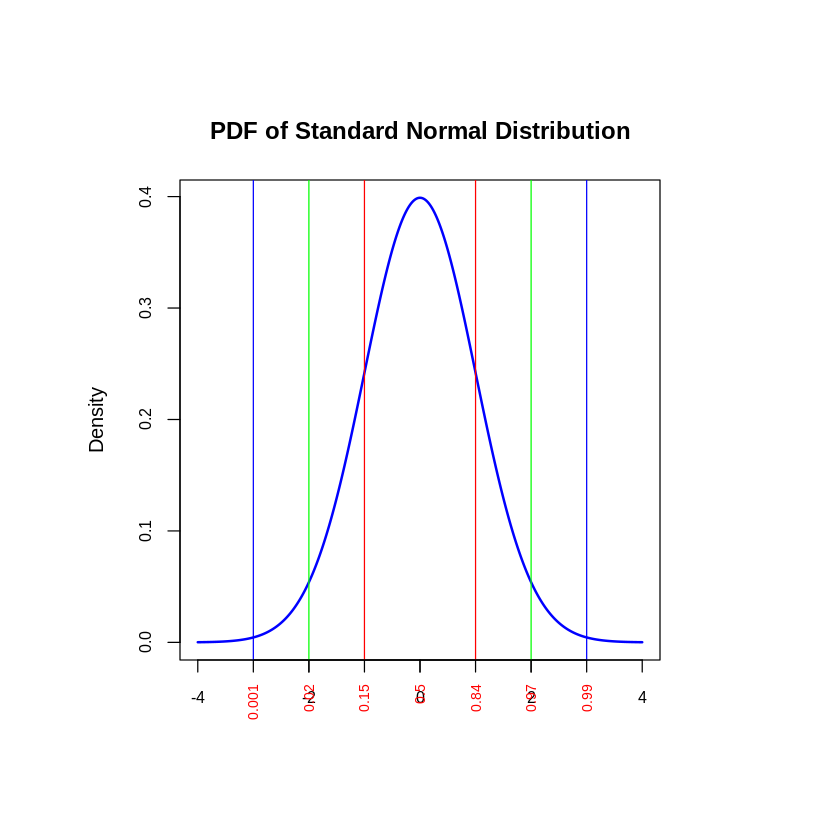

In [3]:
par(pin = c(4, 4))  # par() is used to set or query graphical parameters
                    # Here, we set the size of the plot to 4" by 4". 

plot(sequence,  # Plotting the values (-4, -3.99, -3.98,..., 3.98, 3.99, 4) on x axis
     densities, # Plotting the corresponding probability densities of the values 
                # (-4, -3.99, -3.98,..., 3.98, 3.99, 4) on y axis
     col = "blue", xlab = "", ylab = "Density", type = "l", lwd = 2, cex = 2,  
     main = "PDF of Standard Normal Distribution", cex.axis = .8)

#Vertical lines at 1, 2, and 3 standard deviations from the mean 
abline(v = c(-1, 1), col = ('red'))   # Draw a vertical line at standard deviation of 1
abline(v = c(-2, 2), col = ('green')) # Draw a vertical line at standard deviation of 2
abline(v = c(-3, 3), col = ('blue'))  # Draw a vertical line at standard deviation of 3
axis(1, at = c(-3, -2, -1, 0, 1, 2, 3), 
     labels = c(0.001, 0.02, 0.15, 0.5, 0.84, 0.97, 0.99), # The labels {0.001,0.02,0.15,0.5,0.84,0.97,0.99} 
                                                           # represent the areas under normal curve before 
                                                           # each value.          
     las = 2, col.axis = "red", cex.axis = 0.7)

In [4]:
# These probabilities are for numbers found to the left of the mean
pnorm(-(1:3))

[1] 0.158655254 0.022750132 0.001349898

When you subtract the areas of probability for numbers on left tail with those on the right tail, you will see why the values of the distribution fall within the proportions of 68.2-95.4-99.7

In [5]:
# Note, this is a vector math operation:  A = right tail vector, B = left tail vector
# A - B
pnorm(1:3) - pnorm(-(1:3))

[1] 0.6826895 0.9544997 0.9973002

**Question: ** A random experiment consist of a person taking an IQ test. 
Let `X` be the score on the test.
The test scores have a mean of 100 and a standard deviation of 15. 
What is P(85 ≤ X ≤ 115)?


**Solution:** We need to find the area on the normal curve where this scores will fall. 
The limits 85 and 115 fall exactly one standard deviation (below and above, respectively) from the mean of 100. 
The answer is therefore approximately 68%. 
So the probability of a person getting a score between 85 and 115 is 68%. 

<span style="color:#e57f0b; font-size:14px; font-weight:700">qnorm() </span>

`qnorm()` returns a Z-score for the quantile (i.e., the cut point) passed through the function.  It assumes a normal distribution.  `qnorm()` is the inverse of `pnorm()` and thus returns the inverse of the cumulative distribution function (i.e., -cdf) of the normal distribution.

The default arguments use a mean of zero and standard deviation of one. 

**Question:** Continuing with our previous example of IQ, 
what is the lowest possible IQ score that a person can have and still be in the top 1% of all IQ scores?

**Solution:** We are looking for _q_ when X = 0.99, where X ∼ norm(mean = 100, sd = 15). 

In [6]:
#The below function should return the distribution value at the given probability.
qnorm(0.99, mean = 100, sd = 15)

[1] 134.8952

So, the answer is approximately 134.8952. A person with this IQ score or higher falls in the top 1% of all IQ scores

<span style="color:#1871d6; font-size:24px; font-weight:700"> Normal distribution as an approximation for the binomial distribution</span>

<span style="color:#e57f0b; font-size:16px; font-weight:700">Binomial distributions</span>

When you flip a coin, there are two possible outcomes: heads or tails. 
Each outcome has a fixed probability of 1/2, the same from trial to trial.
Here we consider probability distributions for which there are just two possible 
outcomes, with fixed probabilities summing to one. 
These distributions are called binomial distributions.

The formula we use for calculating probabilities in a binomial distribution is given below, 
(note that the "!" means "factorial", which is a number multiplied by the progressive 
reduction of itself down to 1 ... such that 3! is 3 x 2 x 1 = 6 and 2! is 2 x 1 = 2)

<img src='../images/binomial_formula.gif'>

... where P(x) is the probability of x successes out of N trials, 
N is the number of trials, and π is the probability of success on a given trial. 
Applying this to the coin flip example, if N = 2:

<img src='../images/binomial2.gif'>

image src: http://onlinestatbook.com/2/probability/binomial.html

Now if we were to toss a coin 12 times, what is the probability that the coin will land on heads from 0 to 3 times? 
The answer is found by computing the probability of exactly 0 heads, exactly 1 head, exactly 2 heads, and exactly 3 heads -- and then adding those probabilities together.  The probability of getting from 0 to 3 heads is then the sum of these probabilities.  The probabilities are: 0.0002, 0.0029, 0.0161, and 0.0537.  So the sum of the probabilities is 0.073.  The calculation of cumulative binomial probabilities can be quite tedious.   
  
Abraham de Moivre, an 18th century statistician noted that when the number of events (coin flips) increased, 
the shape of the binomial distribution approached a very smooth curve. 
The curve he discovered is now called the "normal curve."



Assume you have a fair coin and wish to know the probability that you would get 8 heads out of 10 flips.
The binomial distribution has a mean of $\mu$ = Nπ = (10)(0.5) = 5 and a variance of $\sigma^2$ = Nπ(1-π) = (10)(0.5)(0.5) = 2.5. 
The standard deviation $\sigma$ is therefore 1.5811. 

    8 - no of heads

    5 - mean of the population

    1.5811 - SD of population

A total of 8 heads is (8 - 5) / 1.5811 = 1.897 standard deviations above the mean of the distribution. 

A binomial distribution is a type of **discrete probability distribution**, because it relates each value of a discrete random variable (in this example, heads or tails) with its probability of occurrence.  As stated earlier, as the number of samples in a binomial distribution increases, the curve will be seen to approach a normal distribution.  

However, truly normal distributions are **continuous probability distributions**; and in these distributions, the variable is continuous -- not discrete.  The equation used to describe a continuous probability distribution is called a probability density function (aka a density function, a PDF, or a pdf).   

For continuous probability distributions, the question then is, "What is the probability of getting a value exactly _n_ standard deviations above the mean?" You may be surprised to learn that the answer is 0.  In a continuous probability distribution, the probability of the variable being equal to any given value (e.g., 8) is 0.

To determine probability with continuous probability distributions, the solution in this case would be to round off and consider any value from 7.5 to 8.5 to represent an outcome of 8. 
Using this approach, we would figure out the area under a normal curve from 7.5 to 8.5

<img src='../images/normal_binom_p.gif'>

In [7]:
# There are two ways to find the area under a curve
    # a) Using a table of the standard normal distribution (a Z table)
    # b) Using pnormGC() function as shown below

# Here, we assume the mean is 5 and the standard deviation is 1.5811
# Find the z-score to find out the area
#Z score for 8.5
Z1 = (8.5 - 5) / 1.5811
Z1

#Z score for 7.5
Z2 = (7.5 - 5) / 1.5811
Z2

Z1 - Z2

[1] 2.213649

[1] 1.581178

[1] 0.6324711

**Reference**: <a href="http://www.z-table.com/">click here for z-score table</a>

inferring 'repos = NULL' from 'pkgs'


[1] 0.04349223

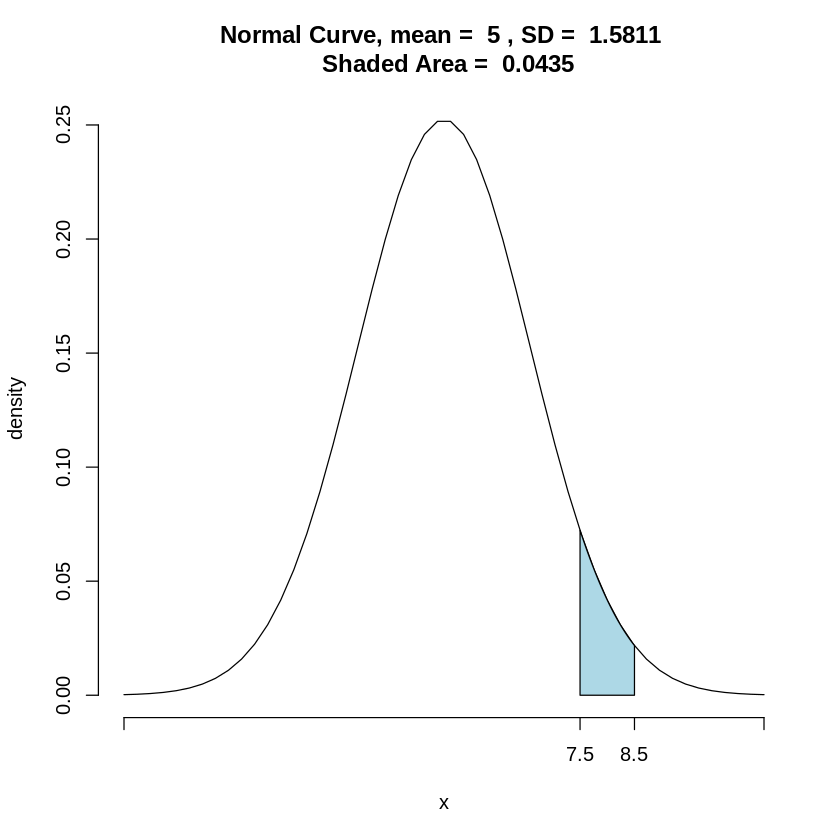

In [13]:
# Area below Z1 of 2.21 using pnormGC function
library(devtools)
packageurl <- ('https://cran.r-project.org/src/contrib/Archive/tigerstats/tigerstats_0.1.2-8.tar.gz')
install.packages(packageurl)
library(tigerstats) # tigerstats

#This gives P(7.5 < X < 8.5), for standard normal X:
pnormGC(c(8.5, 7.5), region="between", mean = 5, sd = 1.5811, graph = TRUE)

The area 0.043492234454135 is an approximation of the probability of obtaining 8 heads.

The same logic applies when calculating the probability of a range of outcomes. For example, to calculate the probability of 7 to 10 flips, calculate the area from 7.5 to 10.5.

**Reference: ** [pnormGC()](https://www.rdocumentation.org/packages/tigerstats/versions/0.3/topics/pnormGC)

**Reference: ** [tigerstats package](https://cran.r-project.org/web/packages/tigerstats/tigerstats.pdf)

<span style="color:#e57f0b; font-size:16px; font-weight:700"> Binomial Distribution </span>

The binomial distribution is based on a Bernoulli trial (Binomial trial), 
which is a random experiment in which there are only two possible outcomes: 
success (S) and failure (F). 
We conduct the Bernoulli trial and let

\begin{gather*}     
X =
\begin{cases}
1 & \text {if the outcome is S ,}\\
0 & \text {if the outcome is F.}\\
\end{cases}
\end{gather*}

If the probability of success is **p** then the probability of failure must be 1 − p = q.

The probability mass function (PMF) is a function that gives the probability that a discrete random variable is exactly equal to some value.  The probability mass function is often the primary means of defining a discrete probability distribution.  
The PMF can be represented mathematically like this:

$P(X = x) = f(x)$,                  

Where _X_ is the random discrete variable and _x_ is some value of _X_.  


<span style="color:#e57f0b; font-size:14px; font-weight:700"> The Binomial Model </span>
 
The Binomial model has three defining properties:
    
    • Bernoulli trials are conducted n times,
    • the trials are independent,
    • the probability of success (p) does not change between trials.

If a random variable `X` follows the binomial distribution with parameters n ∈ N (total number of trials) and p ∈ [0,1] (probability range),
we can write X ~ B(n, p). 

The probability of getting exactly k successes in n trials is given by the probability mass function.  Note the presence of the binomial coefficient in the formula.

<img src="../images/binomial_dist.JPG">

Image src: https://en.wikipedia.org/wiki/Binomial_distribution

(Click on the link for an explanation of the formula.)

#### How to replicate the same in R:

There are R functions for probability mass functions (PMFs) that correspond to the functions we discussed previously for continuous probability distributions.  They are `dbinom()` and `pbinom()`.  `dbinom()` returns the height (i.e., density) of the probability distribution at each point.  `pbinom()` returns the distribution function (i.e., the area under the curve).  We demonstrate their use in the following examples.

Example: Roll 12 dice simultaneously, and let X denote the number of 6s that appear. 
We wish to find the probability of getting seven, eight, or nine 6s at the same time. 
If we let S = { get a 6 on one roll }, then P(S) = 1/6 and the rolls constitute Bernoulli trials; 
thus X ∼ binom(size =12, prob =1/6) and our task is to find P(7 ≤ X ≤ 9). 
This is just

$P(7 ≤ X ≤ 9) = P(X ≤9) − P(X ≤ 6) = F_x(9) − F_x(6)$

In [14]:
pbinom(9, size=12, prob=1/6)

pbinom(6, size=12, prob=1/6)

pbinom(9, size=12, prob=1/6) - pbinom(6, size=12, prob=1/6)

[1] 0.9999992

[1] 0.9987075

[1] 0.001291758

**Example:** Toss a coin three times and let X be the number of Heads observed.
We know from before that X ∼ binom(size = 3, prob = 1/2) which implies the following PMF:

x = # of Heads   |  0   1   2   3
----------------|-----------------
f(x) = IP(X = x)| 1/8 3/8 3/8 1/8

In [16]:
install.packages("distr")
library(distr)
x <- Binom(size = 3, prob = 1/2)
x

also installing the dependencies ‘startupmsg’, ‘sfsmisc’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: startupmsg
Utilities for Start-Up Messages (version 0.9.6)
For more information see ?"startupmsg", NEWS("startupmsg")

Loading required package: sfsmisc
Object Oriented Implementation of Distributions (version 2.8.0)
Attention: Arithmetics on distribution objects are understood as operations on corresponding random variables (r.v.s); see distrARITH().
Some functions from package 'stats' are intentionally masked ---see distrMASK().
Note that global options are controlled by distroptions() ---c.f. ?"distroptions".
For more information see ?"distr", NEWS("distr"), as well as
  http://distr.r-forge.r-project.org/
Package "distrDoc" provides a vignette to this package as well as to several extension packages; try vignette("distr").


Attaching package: ‘distr’

The following objects are masked from ‘package:stats’:

    df, qqplot,

Distribution Object of Class: Binom
 size: 3
 prob: 0.5

In [17]:
# Returns the height (i.e., density) of the probability distribution at each point
# pmf of X evaluated at x = 0,1,2,3

paste(d(x)(0),',', d(x)(1),',', d(x)(2),',',d(x)(3)) 

[1] "0.125 , 0.375 , 0.375 , 0.125"

In [18]:
# Returns the area under the curve at each point
# cdf of X evaluated at x = 0, 1, 2, 3

paste(p(x)(0),',', p(x)(1),',', p(x)(2),',',p(x)(3)) 

[1] "0.125 , 0.5 , 0.875 , 1"

### This concludes the extra distributions notebook